In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.optimizers import SGD
from matplotlib import pyplot
from keras import regularizers

Using TensorFlow backend.


In [2]:
np.random.seed(2)

A_data=np.random.multivariate_normal([1.5,1.5],[[2,0],[0,0.5]],1000)
A_label=np.ones(1000)
B_data=np.random.multivariate_normal([0,0],[[1.5,0],[0,3]],1000)
B_label=np.zeros(1000)
train_data=np.concatenate((A_data[0:800,:],B_data[0:800,:]),axis=0)
train_label=np.concatenate((A_label[0:800],B_label[0:800]))
test_data=np.concatenate((A_data[800:1000,:],B_data[800:1000,:]),axis=0)
test_label=np.concatenate((A_label[800:1000],B_label[800:1000]))
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(1600, 2)
(400, 2)
(1600,)
(400,)


In [3]:
# define the keras model
model = Sequential()
model.add(Dense(3, input_dim=2,kernel_regularizer=regularizers.l2(0.0001), activation='sigmoid'))
model.add(Dense(5,kernel_regularizer=regularizers.l2(0.0001), activation='sigmoid'))
model.add(Dense(3,kernel_regularizer=regularizers.l2(0.0001), activation='sigmoid'))
model.add(Dense(1,kernel_regularizer=regularizers.l2(0.0001), activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
# define the keras model
model1 = Sequential()
model1.add(Dense(3, input_dim=2, activation='sigmoid'))
model1.add(Dense(5, activation='sigmoid'))
model1.add(Dense(3, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

# define the keras model
def l0_reg(weight_mtx):
    return np.count_nonzero(weight_mtx)

model2 = Sequential()
model2.add(Dense(3, input_dim=2, kernel_regularizer = l0_reg,activation='sigmoid'))
model2.add(Dense(5,kernel_regularizer = l0_reg, activation='sigmoid'))
model2.add(Dense(3,kernel_regularizer = l0_reg, activation='sigmoid'))
model2.add(Dense(1,kernel_regularizer = l0_reg, activation='sigmoid'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
# history = model.fit(train_data, train_label,epochs=150, verbose=0,validation_data=(test_data,test_label))
# history1 = model1.fit(train_data, train_label,epochs=150, verbose=0,validation_data=(test_data,test_label))
# history2 = model2.fit(train_data, train_label,epochs=150, verbose=0,validation_data=(test_data,test_label))
history = model.fit(train_data, train_label,epochs=150, verbose=0,validation_split=0.33)
history1 = model1.fit(train_data, train_label,epochs=150, verbose=0,validation_split=0.33)
history2 = model2.fit(train_data, train_label,epochs=150, verbose=0,validation_split=0.33)

_, test_acc = model.evaluate(test_data, test_label, verbose=0)
_, test_acc1 = model1.evaluate(test_data, test_label, verbose=0)
_, test_acc2 = model2.evaluate(test_data, test_label, verbose=0)

print('L2 regularized: Test: %.3f' % (test_acc*100))
print('Not regularized: Test: %.3f' % (test_acc1*100))
print('L0 regularized: Test: %.3f' % (test_acc2*100))


Instructions for updating:
Use tf.cast instead.
L2 regularized: Test: 79.000
Not regularized: Test: 79.000
L0 regularized: Test: 78.750


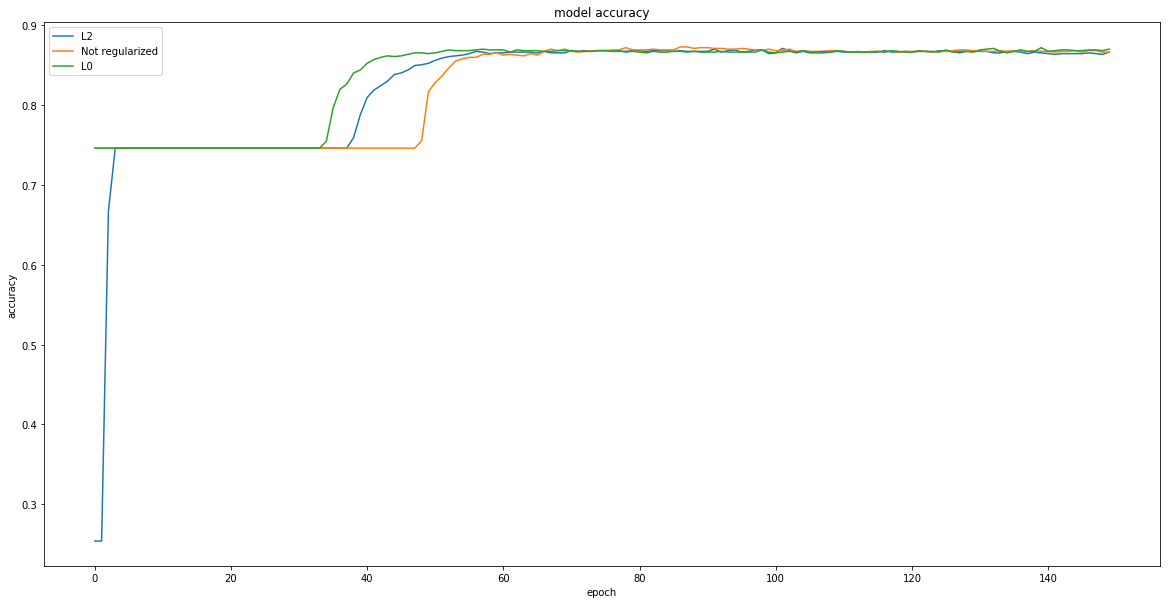

In [5]:
pyplot.figure(figsize=(20,10))
pyplot.plot(history.history['acc'])
pyplot.plot(history1.history['acc'])
pyplot.plot(history2.history['acc'])
# pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['L2', 'Not regularized','L0'], loc='upper left')
pyplot.show()